In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size':15})
plt.style.use('dark_background')
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [155]:
df=pd.read_csv("predictive_maintenance.csv")

In [156]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [158]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [159]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [160]:
df.Target.value_counts()

0    9661
1     339
Name: Target, dtype: int64

In [161]:
df.Target.unique()

array([0, 1], dtype=int64)

In [162]:
df.drop(columns=['UDI','Product ID'],axis=1,inplace=True)

In [163]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


In [164]:
df['Failure Type'].unique()

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

In [165]:
df['Air temperature [K]']=df['Air temperature [K]']-273
df['Process temperature [K]']=df['Process temperature [K]']-273

In [166]:
df.rename(columns={'Air temperature [K]':'Air temperature [°C]', 'Process temperature [K]':'Process temperature [°C]'},inplace=True)

In [167]:
display(df.shape)
display(df.size)

(10000, 8)

80000

In [168]:
df.head()

,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,25.1,35.6,1551,42.8,0,0,No Failure
1,L,25.2,35.7,1408,46.3,3,0,No Failure
2,L,25.1,35.5,1498,49.4,5,0,No Failure
3,L,25.2,35.6,1433,39.5,7,0,No Failure
4,L,25.2,35.7,1408,40.0,9,0,No Failure


In [169]:
df.describe()

,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,27.004930,37.005560,1538.776100,39.986910,107.951000,0.033900
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,22.300000,32.700000,1168.000000,3.800000,0.000000,0.000000
25%,25.300000,35.800000,1423.000000,33.200000,53.000000,0.000000
50%,27.100000,37.100000,1503.000000,40.100000,108.000000,0.000000
75%,28.500000,38.100000,1612.000000,46.800000,162.000000,0.000000
max,31.500000,40.800000,2886.000000,76.600000,253.000000,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


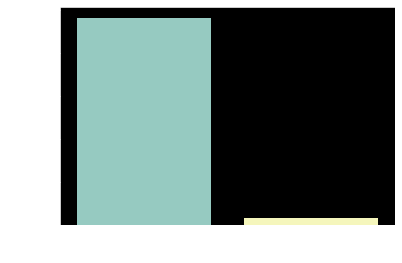

In [170]:
sns.countplot(df.Target)
plt.show()

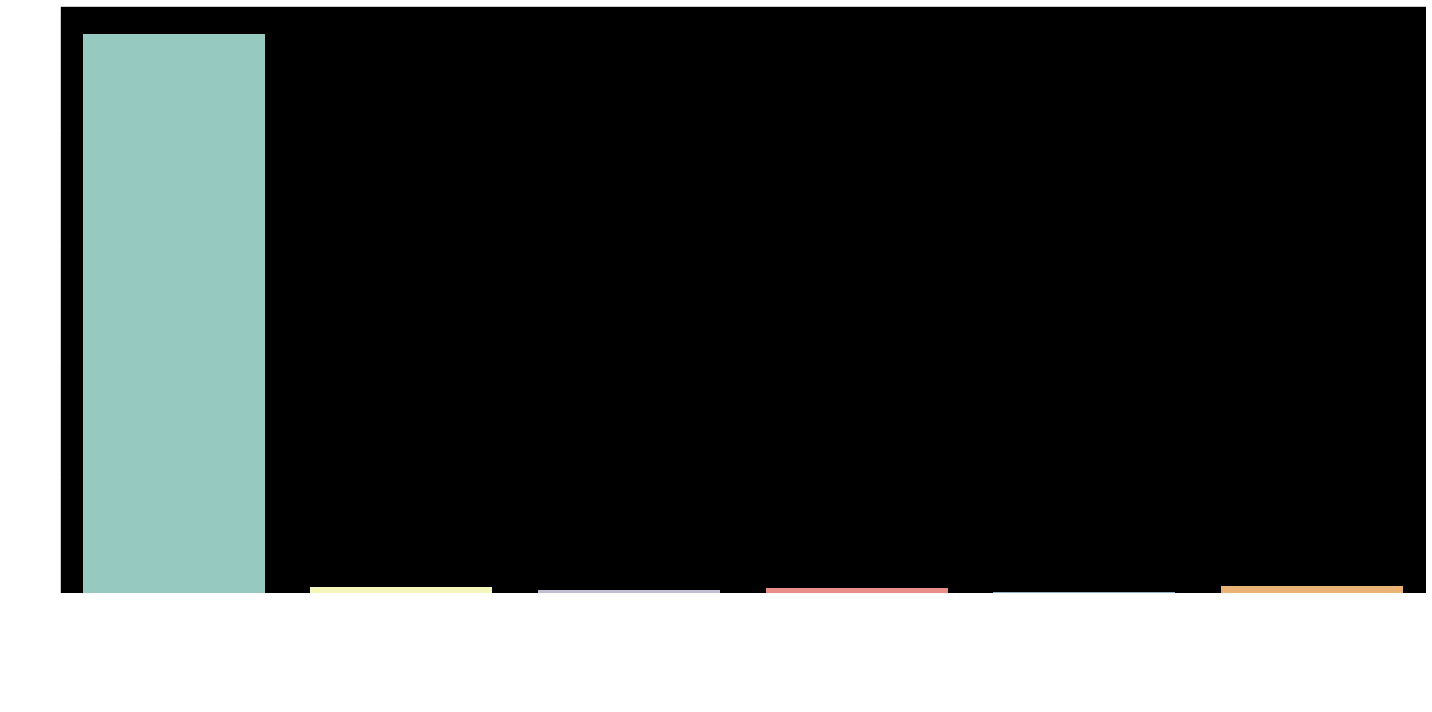

In [171]:
#Fix overlapping 
#Display in %
plt.figure(figsize=(20,10))
sns.countplot(x=df['Failure Type'])
plt.xticks(rotation=45,ha='right')
plt.tight_layout()

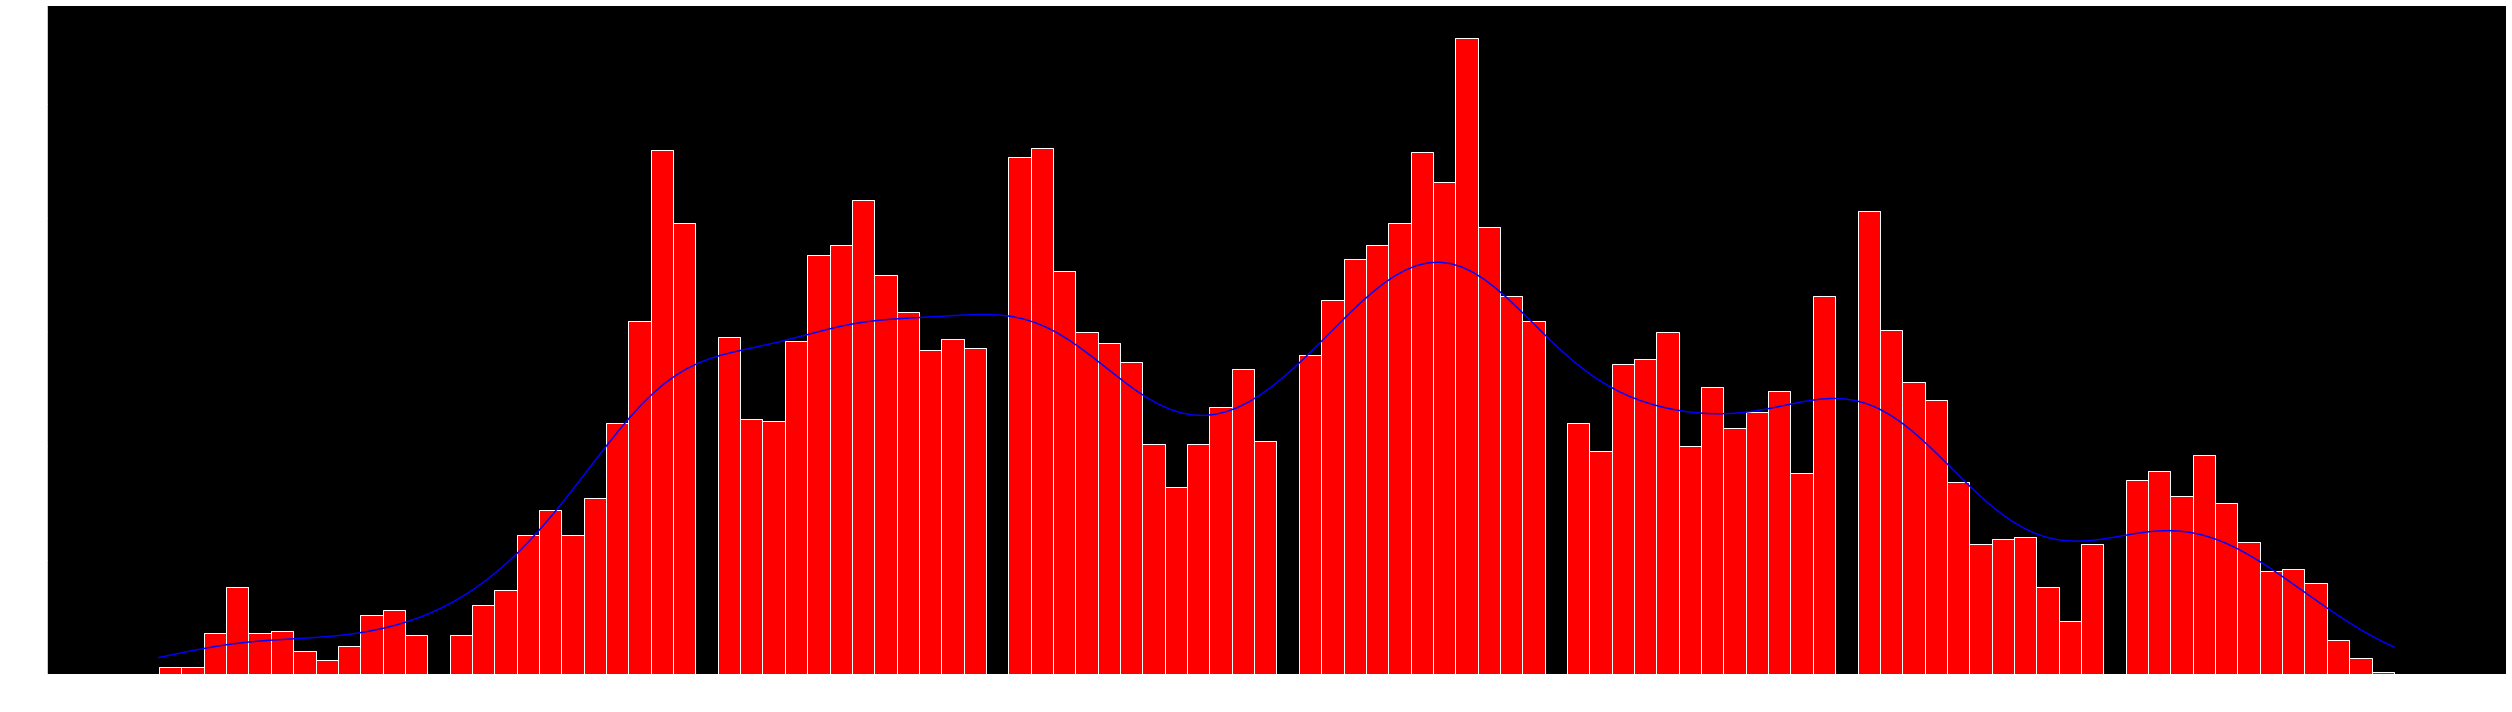

In [172]:
sns.displot(data=df,x='Air temperature [°C]',kde=True,bins=100,color='blue',facecolor='red',height=10,aspect=3.5)

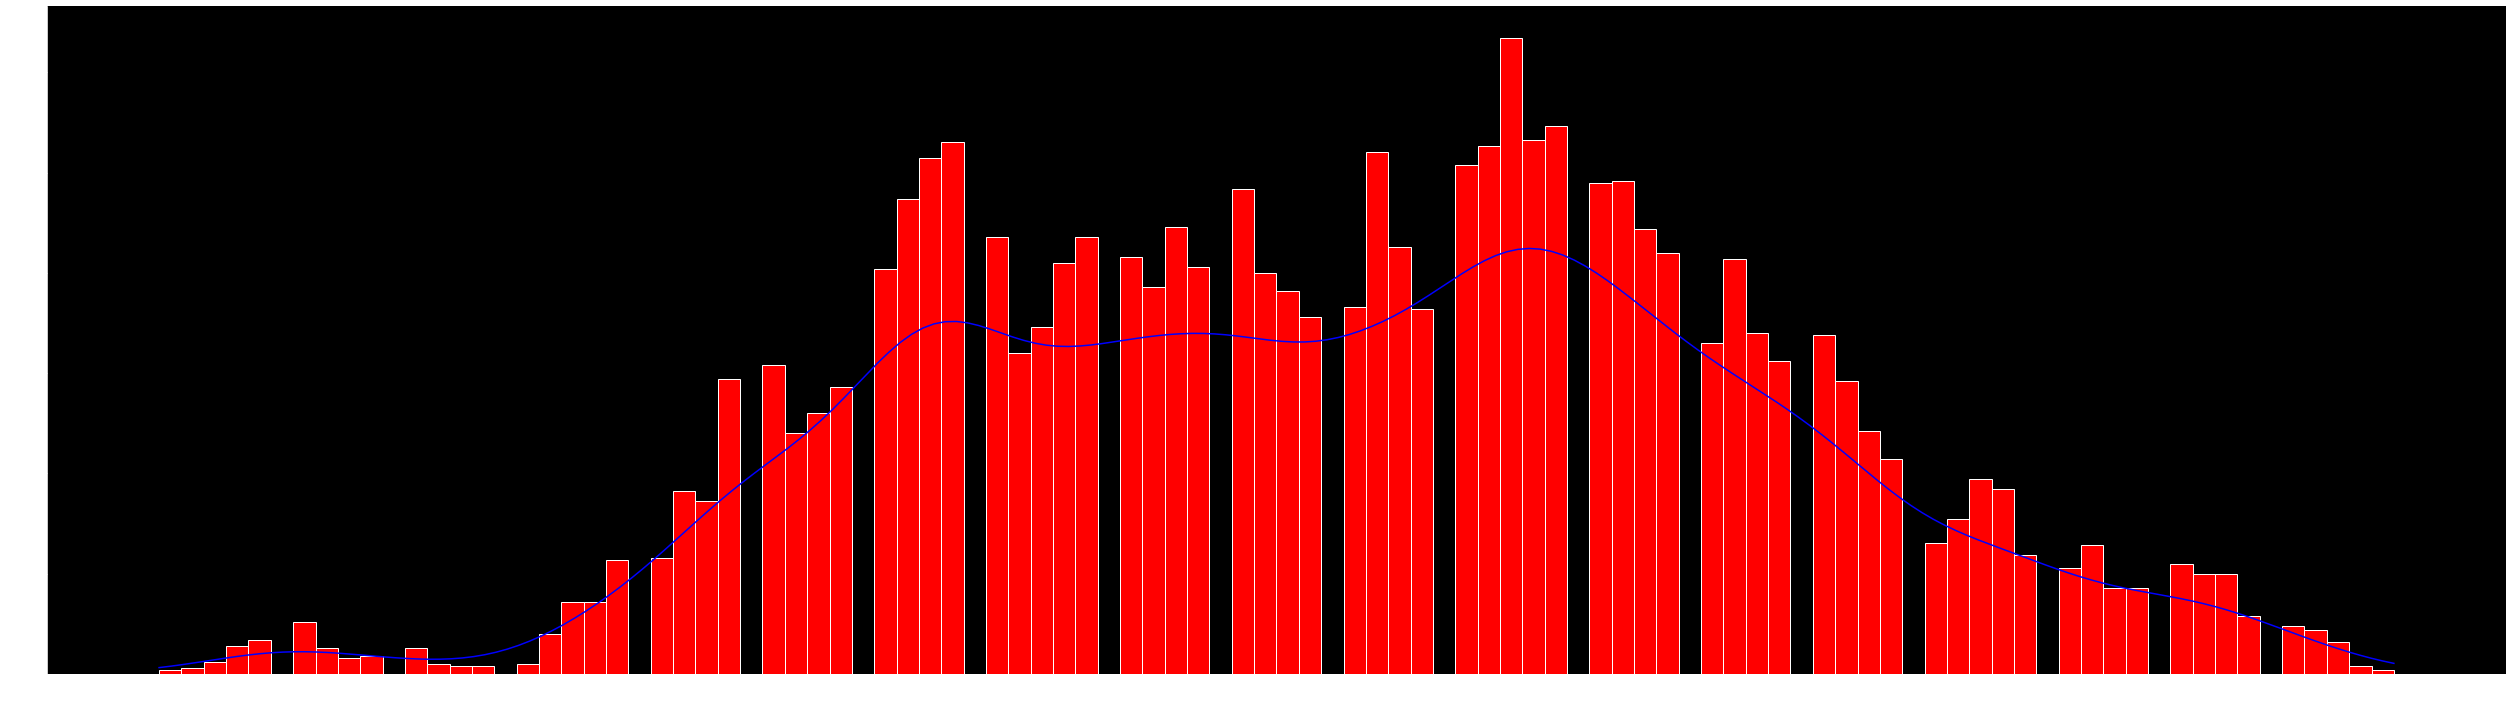

In [173]:
sns.displot(data=df,x='Process temperature [°C]',kde=True,bins=100,color='blue',facecolor='red',height=10,aspect=3.5)

In [174]:
df['Temperature Difference [°C]']=df['Process temperature [°C]']-df['Air temperature [°C]']

In [175]:
df.head()

,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Temperature Difference [°C]
0,M,25.1,35.6,1551,42.8,0,0,No Failure,10.5
1,L,25.2,35.7,1408,46.3,3,0,No Failure,10.5
2,L,25.1,35.5,1498,49.4,5,0,No Failure,10.4
3,L,25.2,35.6,1433,39.5,7,0,No Failure,10.4
4,L,25.2,35.7,1408,40.0,9,0,No Failure,10.5


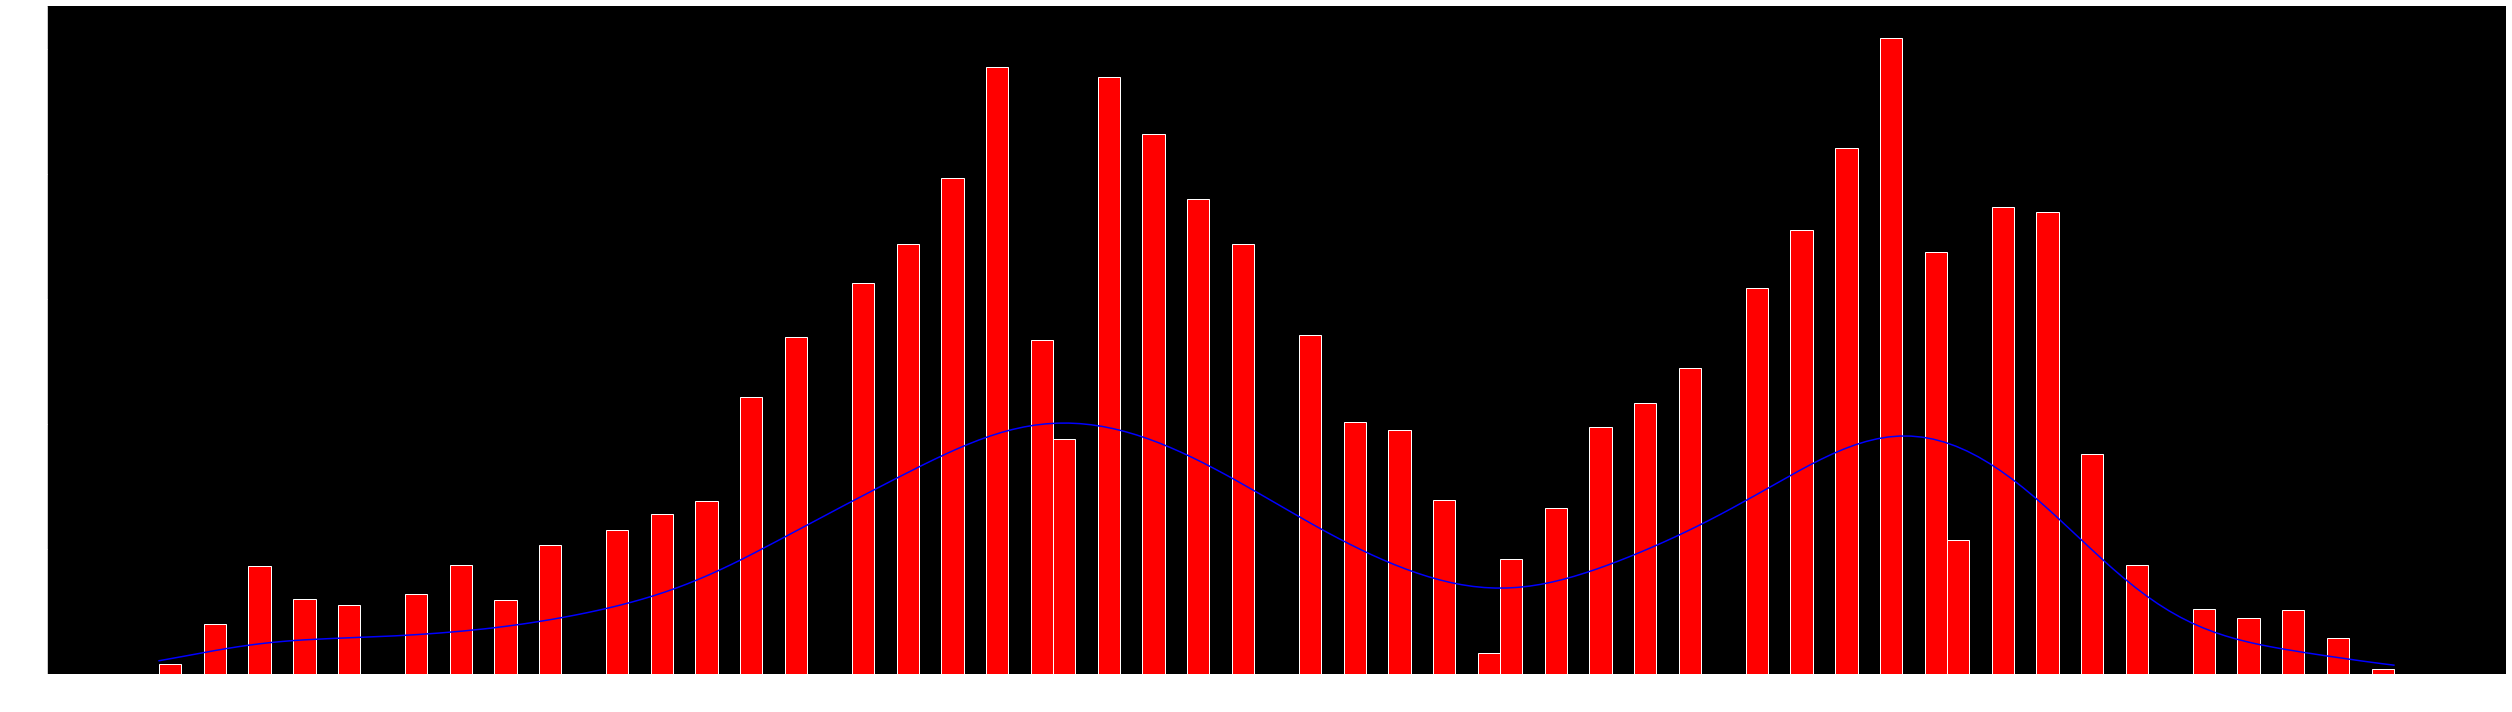

In [176]:
sns.displot(data=df,x='Temperature Difference [°C]',kde=True,bins=100,color='blue',facecolor='red',height=10,aspect=3.5)

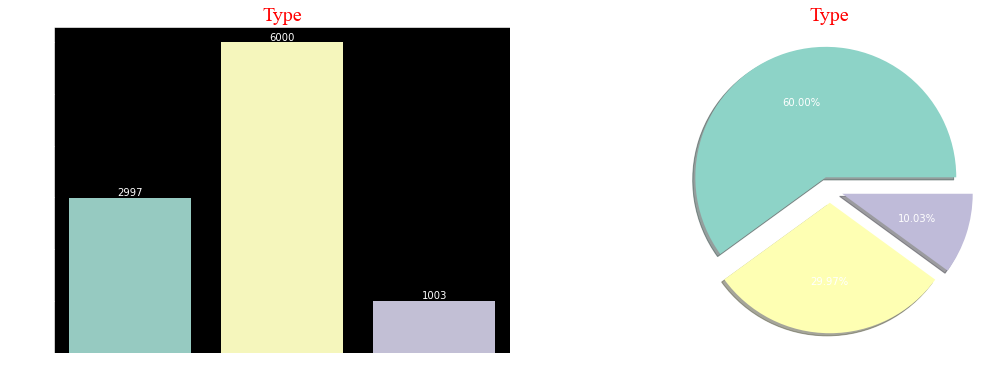

In [177]:
ax = plt.figure(figsize=(18,6))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Type', data=df)
ax.bar_label(ax.containers[0])
plt.title("Type", fontsize=20,color='Red',font='Times New Roman')
ax =plt.subplot(1,2,2)
ax=df['Type'].value_counts().plot.pie(explode=[0.1, 0.1,0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Type", fontsize = 20,color='Red',font='Times New Roman');

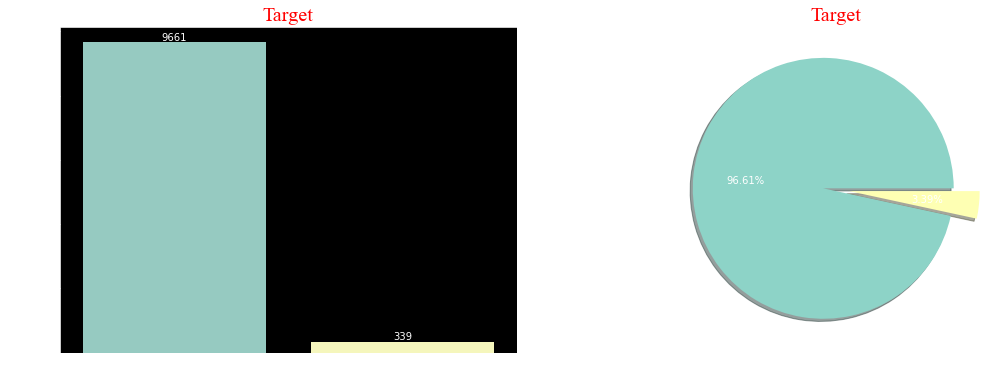

In [178]:
ax = plt.figure(figsize=(18,6))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Target', data=df)
ax.bar_label(ax.containers[0])
plt.title("Target", fontsize=20,color='Red',font='Times New Roman')
ax =plt.subplot(1,2,2)
ax=df['Target'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Target", fontsize = 20,color='Red',font='Times New Roman');

In [179]:
#sns.pairplot(df,hue='Failure Type')

In [180]:
pip install category_encoders

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [181]:
import category_encoders as ce
encoder=ce.OrdinalEncoder(cols=['Type','Failure Type'])
df = encoder.fit_transform(df)
df.head(2)

,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Temperature Difference [°C]
0,1,25.1,35.6,1551,42.8,0,0,1,10.5
1,2,25.2,35.7,1408,46.3,3,0,1,10.5


In [182]:
df.dtypes

Type                             int32
Air temperature [°C]           float64
Process temperature [°C]       float64
Rotational speed [rpm]           int64
Torque [Nm]                    float64
Tool wear [min]                  int64
Target                           int64
Failure Type                     int32
Temperature Difference [°C]    float64
dtype: object

In [183]:
from sklearn.preprocessing import LabelEncoder
scaler=LabelEncoder()

In [184]:
X=df.drop(columns=['Failure Type'],axis=1)
Y=df['Failure Type']

In [185]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=21)

In [186]:
'''plt.figure(figsize=(18,5))
ax=sns.countplot(X=Y_train,palette='tab10')
t=len(Y_train)
from p in ax.patches:
    percentage=f'{100*p.get_height()/t:.1f}%\n'
    x=p.get_x()+p.get_width()/2
    y=p.get_height()
    ax.annotate(percentage,(X,y),ha='center',va='center')
plt.show()'''

"plt.figure(figsize=(18,5))\nax=sns.countplot(X=Y_train,palette='tab10')\nt=len(Y_train)\nfrom p in ax.patches:\n    percentage=f'{100*p.get_height()/t:.1f}%\n'\n    x=p.get_x()+p.get_width()/2\n    y=p.get_height()\n    ax.annotate(percentage,(X,y),ha='center',va='center')\nplt.show()"

# Naive Bayse

In [187]:
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(X_train, Y_train) 

GaussianNB()

In [188]:
y_pred = classifier.predict(X_test)  

In [189]:
accuracy_score(Y_test, y_pred)

0.996

In [190]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(Y_test, y_pred)  

In [191]:
cm


array([[1920,    1,    0,    0,    0,    0],
       [   0,   18,    0,    0,    0,    1],
       [   0,    1,    7,    1,    0,    0],
       [   0,    0,    0,   16,    0,    0],
       [   3,    0,    0,    0,    0,    0],
       [   0,    1,    0,    0,    0,   31]], dtype=int64)

In [192]:
log_train2=round(classifier1.score(X_train,Y_train)*100,2)
log_accuracy2=round(accuracy_score(y_pred,Y_test)*100,2)

In [193]:
print("Training Accuracy :",log_train2,"%")
print("Training Accuracy :",log_accuracy2,"%")
print("\033[1m------------------------------------------\033[0m")
print("Training Accuracy :",classification_report(Y_test,y_pred))
print("\033[1m------------------------------------------\033[0m")


Training Accuracy : 96.21 %
Training Accuracy : 99.6 %
------------------------------------------
Training Accuracy :               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1921
           2       0.86      0.95      0.90        19
           3       1.00      0.78      0.88         9
           4       0.94      1.00      0.97        16
           5       0.00      0.00      0.00         3
           6       0.97      0.97      0.97        32

    accuracy                           1.00      2000
   macro avg       0.79      0.78      0.79      2000
weighted avg       0.99      1.00      1.00      2000

------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# SVM MODEL

In [194]:
from sklearn.svm import SVC

In [195]:
classifier1 = SVC(kernel='sigmoid', random_state=0)  
classifier1.fit(X_train, Y_train)  

SVC(kernel='sigmoid', random_state=0)

In [196]:
y1_pred= classifier1.predict(X_test)  

In [197]:
cm1= confusion_matrix(Y_test, y1_pred)  

In [198]:
cm1

array([[1915,    0,    0,    0,    0,    6],
       [  12,    0,    0,    0,    0,    7],
       [   9,    0,    0,    0,    0,    0],
       [  16,    0,    0,    0,    0,    0],
       [   3,    0,    0,    0,    0,    0],
       [  32,    0,    0,    0,    0,    0]], dtype=int64)

In [199]:
accuracy_score(Y_test, y1_pred)

0.9575

In [200]:
log_train1=round(classifier1.score(X_train,Y_train)*100,2)
log_accuracy1=round(accuracy_score(y1_pred,Y_test)*100,2)

In [201]:
print("Training Accuracy :",log_train1,"%")
print("Training Accuracy :",log_accuracy1,"%")
print("\033[1m------------------------------------------\033[0m")
print("Training Accuracy :",classification_report(Y_test,y1_pred))
print("\033[1m------------------------------------------\033[0m")


Training Accuracy : 96.21 %
Training Accuracy : 95.75 %
------------------------------------------
Training Accuracy :               precision    recall  f1-score   support

           1       0.96      1.00      0.98      1921
           2       0.00      0.00      0.00        19
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00        16
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00        32

    accuracy                           0.96      2000
   macro avg       0.16      0.17      0.16      2000
weighted avg       0.93      0.96      0.94      2000

------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Logistic Regression Model

In [202]:
from sklearn.linear_model import LogisticRegression

In [203]:
logreg=LogisticRegression()

In [204]:
logreg.fit(X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [205]:
predictions=logreg.predict(X_test)
accuracy_score(Y_test,predictions)

0.9625

In [206]:
log_train=round(logreg.score(X_train,Y_train)*100,2)
log_accuracy=round(accuracy_score(predictions,Y_test)*100,2)

In [207]:
print("Training Accuracy :",log_train,"%")
print("Training Accuracy :",log_accuracy,"%")
print("\033[1m------------------------------------------\033[0m")
print("Training Accuracy :",classification_report(Y_test,predictions))
print("\033[1m------------------------------------------\033[0m")


Training Accuracy : 96.71 %
Training Accuracy : 96.25 %
------------------------------------------
Training Accuracy :               precision    recall  f1-score   support

           1       0.96      1.00      0.98      1921
           2       0.00      0.00      0.00        19
           3       0.00      0.00      0.00         9
           4       0.67      0.38      0.48        16
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00        32

    accuracy                           0.96      2000
   macro avg       0.27      0.23      0.24      2000
weighted avg       0.93      0.96      0.95      2000

------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# KNN Model

In [208]:
from sklearn.neighbors import KNeighborsClassifier

In [209]:
KNN=KNeighborsClassifier(n_neighbors=5)

In [210]:
KNN.fit(X_train,Y_train)
KNN.score(X_train,Y_train)

0.973125

In [211]:
KNN.score(X_test,Y_test)

0.965

In [212]:
predictions1=KNN.predict(X_test)
accuracy_score(Y_test,predictions1)

0.965

In [213]:
log_train_1=round(KNN.score(X_train,Y_train)*100,2)
log_accuracy_1=round(accuracy_score(predictions1,Y_test)*100,2)

In [214]:
print("Training Accuracy :",log_train_1,"%")
print("Predition Accuracy :",log_accuracy_1,"%")
print("\033[1m------------------------------------------\033[0m")
print("Classification Accuracy :",classification_report(Y_test,predictions1))
print("\033[1m------------------------------------------\033[0m")


Training Accuracy : 97.31 %
Predition Accuracy : 96.5 %
------------------------------------------
Classification Accuracy :               precision    recall  f1-score   support

           1       0.97      1.00      0.98      1921
           2       0.78      0.37      0.50        19
           3       0.00      0.00      0.00         9
           4       0.75      0.38      0.50        16
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00        32

    accuracy                           0.96      2000
   macro avg       0.42      0.29      0.33      2000
weighted avg       0.94      0.96      0.95      2000

------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [215]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm2 = confusion_matrix(Y_test, predictions1)  

In [216]:
cm2

array([[1917,    1,    0,    2,    0,    1],
       [  12,    7,    0,    0,    0,    0],
       [   9,    0,    0,    0,    0,    0],
       [  10,    0,    0,    6,    0,    0],
       [   3,    0,    0,    0,    0,    0],
       [  31,    1,    0,    0,    0,    0]], dtype=int64)

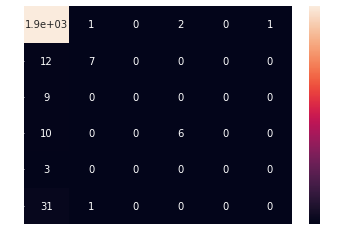

In [217]:
sns.heatmap(cm2,annot=True)
plt.show()

# Decision Tree Model

In [218]:
from sklearn.tree import DecisionTreeClassifier

In [219]:
dtc=DecisionTreeClassifier()

In [220]:
dtc.fit(X_train,Y_train)

DecisionTreeClassifier()

In [221]:
dtc.score(X_train,Y_train)

1.0

In [222]:
dtc.score(X_test,Y_test)

0.994